# Approach 1 [FAIL] : endeavoring to cluster nucleotide sequences (arbitrary 1-4 mapping) and use as dependent

### admittedly a crude approach, but throwing up some abysmal prediction numbers regardless

In [1]:
# generic import environment
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
print('versions')
print ('------------')
import pandas as pd
print('pandas: ', pd.__version__)

pd.set_option('display.max_columns', None)
# pd.set_option('display.float_format', lambda x: '%.3f' % x)

import numpy as np
print('numpy: ', np.__version__)
# np.set_printoptions(suppress=False)

import time as time
import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
print('mpl: ', mpl.__version__)
%matplotlib inline

versions
------------
pandas:  0.17.1
numpy:  1.10.4
mpl:  1.5.1


In [2]:
# load data
df = pd.read_csv('data/kmer_example.csv', sep='\t')
print(df.shape)

(999, 607)


In [3]:
# force convert R/S col's to int; check for erroneous data
for x in df.columns.values[1:]:
    df[x] = df[x].astype(int)

In [4]:
df.head(2)

,kmer,R_1413323.3,R_1413324.3,R_1413325.3,R_1413328.3,R_1413329.3,R_1413331.3,R_1413332.3,R_1413333.3,R_1413334.3,R_1413336.3,R_1413337.3,R_1413338.3,R_1413339.3,R_1413340.3,R_1413341.3,R_1413342.3,R_1413343.3,R_1413344.3,R_1413345.3,R_1413346.3,R_1413347.3,R_1413349.3,R_1413352.3,R_1413353.3,R_1413373.3,R_1413374.3,R_1413376.3,R_1413377.3,R_1413378.3,R_1413379.3,R_1413380.3,R_1413381.3,R_1413382.3,R_1413383.3,R_1413384.3,R_1413385.3,R_1413387.3,R_1413388.3,R_1413389.3,R_1413390.3,R_1413391.3,R_1413392.3,R_1413393.3,R_1413394.3,R_1413395.3,R_1413396.3,R_1413399.3,R_1413401.3,R_1413402.3,R_1413405.3,R_1413406.3,R_1413407.3,R_1413408.3,R_1413409.3,R_1413410.3,R_1413411.3,R_1413412.3,R_1413413.3,R_1413416.3,R_1413418.3,R_1413419.3,R_1413420.3,R_1413421.3,R_1413422.3,R_1413423.3,R_1413424.3,R_1413425.3,R_1413426.3,R_1413427.3,R_1413428.3,R_1413429.3,R_1413430.3,R_1413431.3,R_1413432.3,R_1413433.3,R_1413434.3,R_1413435.3,R_1413436.3,R_1413437.3,R_1413438.3,R_1413439.3,R_1413440.3,R_1413441.3,R_1413446.3,R_1413447.3,R_1413448.3,R_1413449.3,R_1413450.3,R_1413451.3,R_1413456.3,R_1413457.3,R_1413458.3,R_1413459.3,R_1413461.3,R_1413466.3,R_1413467.3,R_1413470.3,R_1413471.3,R_1413472.3,R_1413473.3,R_1413474.3,R_1413475.3,R_1413476.3,R_1413477.3,R_1413480.3,R_1413484.3,R_1413485.3,R_1413486.3,R_1413487.3,R_1413488.3,R_1413514.3,R_1413515.3,R_1413516.3,R_1413517.3,R_1413518.3,R_1413519.3,R_1413521.3,R_1413522.3,R_1413523.3,R_1413524.3,R_1413570.3,R_1413572.3,R_1413574.3,R_1413575.3,R_1413576.3,R_1413577.3,R_1413578.3,R_1413580.3,R_1413581.3,R_1413586.3,R_1413587.3,R_1413588.3,R_1413591.3,R_1413592.3,R_1413595.3,R_1413596.3,R_1413597.3,R_1413599.3,R_1413600.3,R_1413603.3,R_1422390.3,R_1422391.3,R_1422392.3,R_1422393.3,R_1422394.3,R_1422395.3,R_1422396.3,R_1422397.3,R_1422398.3,R_1422399.3,R_1422400.3,R_1422401.3,R_1422402.3,R_1422403.3,R_1422404.3,R_1422405.3,R_1422406.3,R_1422407.3,R_1422408.3,R_1422409.3,R_1422410.3,R_1422411.3,R_1422412.3,R_1422413.3,R_1422414.3,R_1422415.3,R_1422416.3,R_1422417.3,R_1422418.3,R_1422419.3,R_1422420.3,R_1422421.3,R_1422422.3,R_1422423.3,R_1422424.3,R_1422425.3,R_1422426.3,R_1422427.3,R_1422428.3,R_1422429.3,R_1422430.3,R_1422431.3,R_1422432.3,R_1422433.3,R_1422434.3,R_1422435.3,R_1422436.3,R_1422437.3,R_1422438.3,R_1422439.3,R_1422440.3,R_1422441.3,R_1422442.3,R_1422443.3,R_1422444.3,R_1422445.3,R_1422446.3,R_1422447.3,R_1422448.3,R_1422449.3,R_1422450.3,R_1422451.3,R_1422452.3,R_1422453.3,R_1422454.3,R_1422455.3,R_1422456.3,R_1422457.3,R_1422458.3,R_1422459.3,R_1422460.3,R_1422461.3,R_1422462.3,R_1422463.3,R_1422464.3,R_1422465.3,R_1422466.3,R_1422467.3,R_1422468.3,R_1422469.3,R_1422470.3,R_1422471.3,R_1422472.3,R_1422473.3,R_1422474.3,R_1422475.3,R_1422476.3,R_1422477.3,R_1422478.3,R_1422479.3,R_1422480.3,R_1422481.3,R_1422482.3,R_1422483.3,R_1422484.3,R_1422485.3,R_1422488.3,R_1422489.3,R_1422490.3,R_1422491.3,R_1422492.3,R_1422493.3,R_1422494.3,R_1422495.3,R_1422497.3,R_1422498.3,R_1422500.3,R_1422503.3,R_1422508.3,R_1422509.3,R_1422510.3,R_1422511.3,R_1422512.3,R_1422513.3,R_1422514.3,R_1422515.3,R_1422516.3,R_1422517.3,R_1422518.3,R_1422519.3,R_1422520.3,R_1422521.3,R_1422522.3,R_1422523.3,R_1422524.3,R_1422525.3,R_1422526.3,R_1422527.3,R_1422528.3,R_1422529.3,R_1422530.3,R_1422531.3,R_1422532.3,R_1422533.3,R_1422534.3,R_1422535.3,R_1422536.3,R_1422537.3,R_1422538.3,R_1422539.3,R_1422540.3,R_1422541.3,R_1422542.3,R_1422543.3,R_1422544.3,R_1422545.3,R_1422546.3,R_1422547.3,R_1422548.3,R_1422549.3,R_1422550.3,R_1422551.3,R_1422552.3,R_1422553.3,R_1422554.3,R_1422555.3,R_1422556.3,R_1422557.3,R_1422558.3,R_1422559.3,R_1422560.3,R_1422561.3,R_1422562.3,R_1422563.3,R_1422564.3,R_1422565.3,R_1422566.3,R_1422567.3,R_1422568.3,R_1422569.3,R_1422570.3,R_1422571.3,R_1422572.3,R_1422573.3,R_1422574.3,R_1422575.3,R_1422576.3,R_1422577.3,R_1422578.3,R_1422579.3,R_1422580.3,R_1422581.3,R_1422582.3,R_1422583.3,R_1422584.3,R_1422585.3,R_1422586.3,R_1422587.3,R_1422588.3,R_1422589.3,R_1422590.3,R_1422591.3,R_1422592.

In [5]:
# simple function to determine string length
def str_length(s):
    return len(str(s))

In [6]:
# verifying all kmer's appropriate length (28)
df['tmp'] = df['kmer'].apply(str_length)
print(list(df['tmp'].unique()))
df.drop('tmp', axis=1, inplace=True)

[28]


In [7]:
# check for missing values | instantiates missing val df
# =-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
column_bucket = []
missing_bucket = []
percent_missing_bucket = []
for x in df.columns.values:
    column_bucket.append(x)
    missing_bucket.append(df[x].shape[0] - df[x].count().sum())
    percent_missing_bucket.append(round ((df[x].shape[0] - df[x].count().sum()) / float(df[x].shape[0])*100,2))
df_missing = pd.DataFrame({
    'feature' : column_bucket,
    'missing_count' : missing_bucket,
    '%_missing' : percent_missing_bucket
    })
df_missing = df_missing[['feature','%_missing','missing_count']]
df_missing.sort_values('%_missing',ascending=False)
print(df_missing['missing_count'].sum())
df_missing = pd.DataFrame() #wipe to spare memory

0


In [8]:
# verify kmer observations all unique
print(len(df))
print(len(df['kmer'].unique()))

999
999


### correlation assessment

In [9]:
corr = df.iloc[:,1:].corr()

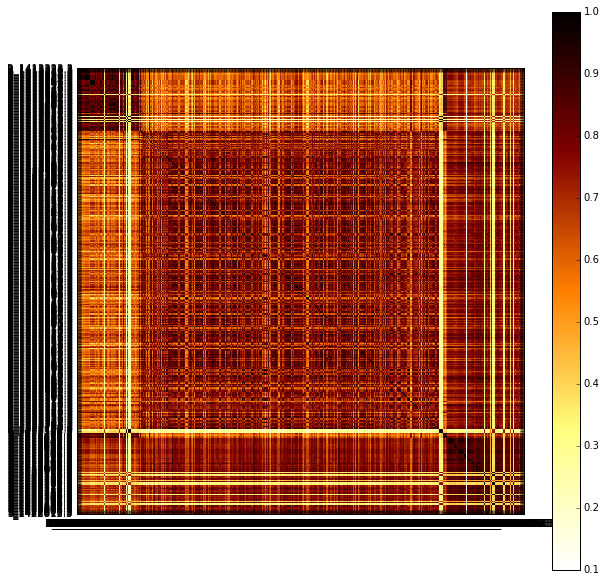

In [10]:
# interpolation = none / nearest / bilinear / bicubic
# cmap = 'hot' afmhot, copper, gist_heat, and hot YlOrRd, bone, gist_heat, winter, summer, coolwarm, bwr, RdYlGn, ocean, afmhot, autumn,
mpl.rc('figure', figsize=(10, 10))
plt.imshow(corr, cmap=plt.cm.afmhot_r, interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);
plt.show;

####### eyeballing - looks reasonably high | suggests dimension reduction can be appropriately used

### check for true unique resistance pattern

In [83]:
# force convert R/S col's to int; check for erroneous data
for x in df.columns.values[1:]:
    df[x] = df[x].astype(str)

join_cols = df.columns.values[1:]

mapping_df = pd.DataFrame()

mapping_df['super_kmer'] = df[join_cols].apply(lambda x: ''.join(x), axis=1)

og_shape = df.shape[1]
new_shape = len(mapping_df['super_kmer'].unique())
print( og_shape, '|', new_shape, ' ==> ', np.round((1 - (float(new_shape)/float(og_shape))),4), '(%) of the exact resistance patterns are duplicates' )

for x in df.columns.values[1:]:
    df[x] = df[x].astype(int)

606 | 547  ==>  0.0974 (%) of the exact resistance patterns are duplicates


### map kmer string sequences for "arbitrary" clustered  numerical assignments | use as target vector

In [12]:
target = pd.DataFrame()
target['kmer'] = df['kmer']
df.drop('kmer', axis=1, inplace=True)

###### the following presumes exact sequencing of kmer 4 components [A,C,T,G] matters 

In [13]:
deconstructed_kmer_list = []
for x in target['kmer'].values:
    deconstructed_kmer_list.append(np.array(list(x)))
decon_df = pd.DataFrame({'kmer':target['kmer'].values,'components':deconstructed_kmer_list})    

In [14]:
# verify that only 4 nucleotide bases in data
total_set = set([])
for xx in decon_df['components'].values:
    tmp_unique = pd.Series(xx).unique()
    for yy in tmp_unique:
        total_set.add(yy)

In [15]:
total_set = list(total_set)
total_set.sort()
total_set

['A', 'C', 'G', 'T']

In [16]:
genomemap = pd.DataFrame()
genomemap['nucl_comp'] = total_set
genomemap['arb_map_int'] = np.arange(len(total_set))+1
genomemap.head(2)

,nucl_comp,arb_map_int
0,A,1
1,C,2


In [17]:
kmer_map_base = pd.DataFrame(decon_df['components'])

In [18]:
def nucleotide_string_to_list_clean(s):
    return str(s).replace('[','').replace(']','').replace('\n','').replace('"','').replace("'","").replace(',','').split(' ')
kmer_map_base['components'] = kmer_map_base['components'].apply(nucleotide_string_to_list_clean)

In [19]:
kmer_arb_mapped = pd.DataFrame()

In [20]:
for x in range(0,len(kmer_map_base)):
    tmpdf = pd.DataFrame({kmer_map_base.index.values[x]:kmer_map_base['components'][x]})
    kmer_arb_mapped = pd.concat([kmer_arb_mapped, tmpdf], axis=1, join='outer')

In [21]:
kmer_arb_mapped.shape

(28, 999)

In [22]:
kmer_arb_mapped.tail(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998
26,C,A,A,A,C,A,A,T,G,C,C,C,C,G,A,C,C,A,T,A,A,C,T,G,A,G,C,A,A,A,T,T,T,G,G,T,T,A,A,C,A,A,A,T,A,A,C,G,A,G,C,G,C,T,G,

In [23]:
mask_zip = list(zip(genomemap['nucl_comp'], genomemap['arb_map_int']))

In [24]:
# todo: refactor for full df application
def nucleotide_masking(s):
    for x in range(0,len(mask_zip)):
        if str(s).upper() == mask_zip[x][0]:
            return mask_zip[x][1]

In [25]:
for x in kmer_arb_mapped.columns.values:
    kmer_arb_mapped[x] = kmer_arb_mapped[x].apply(nucleotide_masking)

In [26]:
kmer_arb_mapped.tail(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998
26,2,1,1,1,2,1,1,4,3,2,2,2,2,3,1,2,2,1,4,1,1,2,4,3,1,3,2,1,1,1,4,4,4,3,3,4,4,1,1,2,1,1,1,4,1,1,2,3,1,3,2,3,2,4,3,

In [27]:
corr = kmer_arb_mapped.corr()

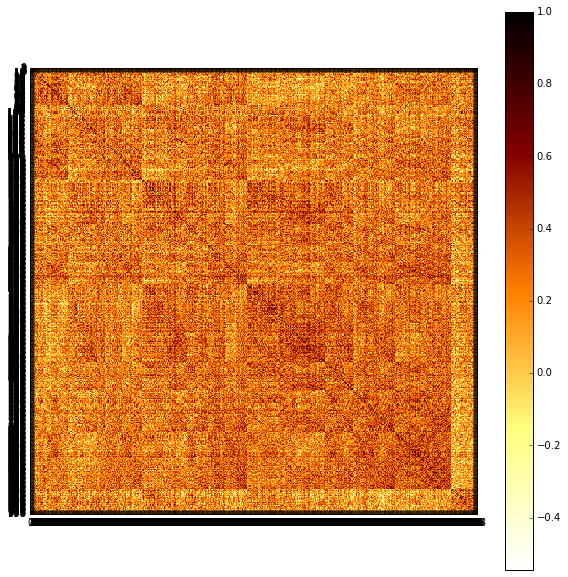

In [28]:
# interpolation = none / nearest / bilinear / bicubic
# cmap = 'hot' afmhot, copper, gist_heat, and hot YlOrRd, bone, gist_heat, winter, summer, coolwarm, bwr, RdYlGn, ocean, afmhot, autumn,
mpl.rc('figure', figsize=(10, 10))
plt.imshow(corr, cmap=plt.cm.afmhot_r, interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns)
plt.yticks(range(len(corr)), corr.columns);
plt.show;

In [29]:
kmer_arb_mapped.tail(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998
25,1,3,2,1,3,4,1,4,1,1,1,1,1,2,2,2,1,4,4,1,4,1,1,4,1,4,4,4,2,1,1,1,1,4,4,1,3,4,1,4,2,1,1,3,1,2,1,3,1,2,4,4,1,2,4,

In [30]:
# X = kmer_arb_mapped.values
kmer_arb_mapped = kmer_arb_mapped.T.copy()
X = kmer_arb_mapped.values

In [31]:
from sklearn.decomposition import PCA

In [32]:
variance_thesshold = 0.95

In [33]:
# manual build for fun:
expl_var_list = []
pca_range = np.arange(X.shape[1]) + 1
for x in pca_range:
    pca = PCA(n_components=x)
    pca.fit(X)
    expl_var_list.append(sum(pca.explained_variance_ratio_))

In [34]:
pcaevdf = pd.DataFrame({'ev':expl_var_list,'num':pca_range})
pcaevdf = pcaevdf[(pcaevdf['ev']>=variance_thesshold)]
pcaevdf = pcaevdf.sort_values(['ev','num'],ascending=True)

In [35]:
pcaevdf.head(3)

,ev,num
19,0.967472,20
20,0.998887,21
21,1.000000,22


In [36]:
pca_results = pcaevdf.iloc[0,:].values
print( str(int(pca_results[1])), '"components" capture '+ str(np.round(pca_results[0],3)) + '% variance in data'   )
print('-------------------')
print( str(np.round(pca_results[1] / float(df.shape[1]),2)) + '% ==> '+str(np.round(pca_results[0],3))+'%' )

20 "components" capture 0.967% variance in data
-------------------
0.03% ==> 0.967%


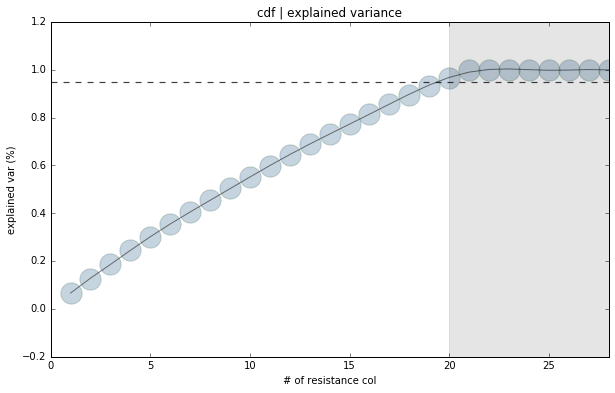

In [37]:
mpl.rc('figure', figsize=(10, 6))
xx = pca_range
yy = expl_var_list

max_show = max(yy) + max(yy)*.10
plt.scatter(xx,yy,color='#1E5484',s=450,alpha=0.25)
plt.scatter(xx,yy,facecolor='none',edgecolor='yellow',s=450,alpha=0.06,lw=1)

num_fit = 11
f1=np.polyfit(xx,yy,num_fit)
plt.plot(xx,np.polyval(f1,xx),color='black',zorder=700,lw=1,alpha=0.5)

plt.axvspan(pca_results[1],X.shape[1],alpha=0.1, color='black',zorder=1000)
plt.axhline(y=variance_thesshold, linewidth=1.2, color='black', alpha=0.75, linestyle='--')

plt.xlim(0,28)

plt.ylabel("explained var (%)")
plt.xlabel("# of resistance col")
plt.title('cdf | explained variance')
plt.show;

####### Suggests you can "cluster" nucleotide sequences to smaller # of groups (~20) & assign them accordingly, and use as target vector based on resistence sequencing

In [38]:
from mpl_toolkits.mplot3d import Axes3D

In [39]:
from sklearn.cluster import KMeans

In [40]:
kmn = KMeans(n_clusters=20)
kmn.fit(X)
labels = kmn.labels_

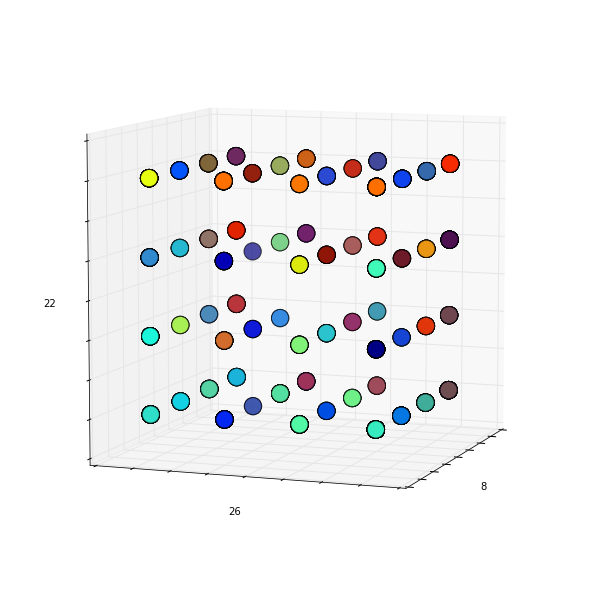

In [41]:
# plot along random 3 dimensions for clustering assessment
rnd1 = np.random.randint((X.shape[1]))
rnd2 = np.random.randint((X.shape[1]))
rnd3 = np.random.randint((X.shape[1]))

fig = plt.figure(1, figsize=(8, 8))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, 1, 1], elev=8, azim=200)
plt.cla()

ax.scatter(X[:, rnd1], X[:, rnd2], X[:, rnd3], c=labels.astype(np.float),s=300)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('{0}'.format(rnd1))
ax.set_ylabel('{0}'.format(rnd2))
ax.set_zlabel('{0}'.format(rnd3))

plt.show()

######## doesn't yield very clear 'patterns'

In [42]:
cluster_target = pd.DataFrame()
cluster_target['y'] = labels
cluster_target.shape

(999, 1)

### reverse map back to original nucleotide string, add cluster label

In [43]:
kmer_arb_mapped.tail(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
997,1,1,1,1,1,1,2,1,1,2,4,1,2,4,2,1,1,4,1,3,4,1,3,1,3,4,1,3
998,1,1,1,1,1,1,2,1,1,2,4,1,3,4,4,3,1,4,3,1,1,1,4,4,3,2,4,3


In [44]:
def reverse_nucleotide_masking(s):
    for x in range(0,len(mask_zip)):
        if s == mask_zip[x][1]:
            return mask_zip[x][0]

In [45]:
for x in kmer_arb_mapped.columns.values:
    kmer_arb_mapped[x] = kmer_arb_mapped[x].apply(reverse_nucleotide_masking)

In [46]:
kmer_arb_mapped.tail(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
997,A,A,A,A,A,A,C,A,A,C,T,A,C,T,C,A,A,T,A,G,T,A,G,A,G,T,A,G
998,A,A,A,A,A,A,C,A,A,C,T,A,G,T,T,G,A,T,G,A,A,A,T,T,G,C,T,G


In [47]:
cluster_mapped_kmer_df = pd.DataFrame()
cluster_mapped_kmer_df['kmer'] = kmer_arb_mapped[kmer_arb_mapped.columns.values].apply(lambda x: ''.join(x), axis=1)

In [48]:
# add cluster targeting
cluster_mapped_kmer_df['cluster_assignment'] = cluster_target['y']

In [49]:
cluster_mapped_kmer_df.head(3)

,kmer,cluster_assignment
0,AAAAAAAAAACACAAAAAAATAACCACA,2
1,AAAAAAAAAACGAATGTACACAATCGAA,15
2,AAAAAAAAACACAAAAAAATAACCACAC,2


### Remap cluster assignment to target data

In [50]:
print(df.shape)
df.head(2)

(999, 606)


,R_1413323.3,R_1413324.3,R_1413325.3,R_1413328.3,R_1413329.3,R_1413331.3,R_1413332.3,R_1413333.3,R_1413334.3,R_1413336.3,R_1413337.3,R_1413338.3,R_1413339.3,R_1413340.3,R_1413341.3,R_1413342.3,R_1413343.3,R_1413344.3,R_1413345.3,R_1413346.3,R_1413347.3,R_1413349.3,R_1413352.3,R_1413353.3,R_1413373.3,R_1413374.3,R_1413376.3,R_1413377.3,R_1413378.3,R_1413379.3,R_1413380.3,R_1413381.3,R_1413382.3,R_1413383.3,R_1413384.3,R_1413385.3,R_1413387.3,R_1413388.3,R_1413389.3,R_1413390.3,R_1413391.3,R_1413392.3,R_1413393.3,R_1413394.3,R_1413395.3,R_1413396.3,R_1413399.3,R_1413401.3,R_1413402.3,R_1413405.3,R_1413406.3,R_1413407.3,R_1413408.3,R_1413409.3,R_1413410.3,R_1413411.3,R_1413412.3,R_1413413.3,R_1413416.3,R_1413418.3,R_1413419.3,R_1413420.3,R_1413421.3,R_1413422.3,R_1413423.3,R_1413424.3,R_1413425.3,R_1413426.3,R_1413427.3,R_1413428.3,R_1413429.3,R_1413430.3,R_1413431.3,R_1413432.3,R_1413433.3,R_1413434.3,R_1413435.3,R_1413436.3,R_1413437.3,R_1413438.3,R_1413439.3,R_1413440.3,R_1413441.3,R_1413446.3,R_1413447.3,R_1413448.3,R_1413449.3,R_1413450.3,R_1413451.3,R_1413456.3,R_1413457.3,R_1413458.3,R_1413459.3,R_1413461.3,R_1413466.3,R_1413467.3,R_1413470.3,R_1413471.3,R_1413472.3,R_1413473.3,R_1413474.3,R_1413475.3,R_1413476.3,R_1413477.3,R_1413480.3,R_1413484.3,R_1413485.3,R_1413486.3,R_1413487.3,R_1413488.3,R_1413514.3,R_1413515.3,R_1413516.3,R_1413517.3,R_1413518.3,R_1413519.3,R_1413521.3,R_1413522.3,R_1413523.3,R_1413524.3,R_1413570.3,R_1413572.3,R_1413574.3,R_1413575.3,R_1413576.3,R_1413577.3,R_1413578.3,R_1413580.3,R_1413581.3,R_1413586.3,R_1413587.3,R_1413588.3,R_1413591.3,R_1413592.3,R_1413595.3,R_1413596.3,R_1413597.3,R_1413599.3,R_1413600.3,R_1413603.3,R_1422390.3,R_1422391.3,R_1422392.3,R_1422393.3,R_1422394.3,R_1422395.3,R_1422396.3,R_1422397.3,R_1422398.3,R_1422399.3,R_1422400.3,R_1422401.3,R_1422402.3,R_1422403.3,R_1422404.3,R_1422405.3,R_1422406.3,R_1422407.3,R_1422408.3,R_1422409.3,R_1422410.3,R_1422411.3,R_1422412.3,R_1422413.3,R_1422414.3,R_1422415.3,R_1422416.3,R_1422417.3,R_1422418.3,R_1422419.3,R_1422420.3,R_1422421.3,R_1422422.3,R_1422423.3,R_1422424.3,R_1422425.3,R_1422426.3,R_1422427.3,R_1422428.3,R_1422429.3,R_1422430.3,R_1422431.3,R_1422432.3,R_1422433.3,R_1422434.3,R_1422435.3,R_1422436.3,R_1422437.3,R_1422438.3,R_1422439.3,R_1422440.3,R_1422441.3,R_1422442.3,R_1422443.3,R_1422444.3,R_1422445.3,R_1422446.3,R_1422447.3,R_1422448.3,R_1422449.3,R_1422450.3,R_1422451.3,R_1422452.3,R_1422453.3,R_1422454.3,R_1422455.3,R_1422456.3,R_1422457.3,R_1422458.3,R_1422459.3,R_1422460.3,R_1422461.3,R_1422462.3,R_1422463.3,R_1422464.3,R_1422465.3,R_1422466.3,R_1422467.3,R_1422468.3,R_1422469.3,R_1422470.3,R_1422471.3,R_1422472.3,R_1422473.3,R_1422474.3,R_1422475.3,R_1422476.3,R_1422477.3,R_1422478.3,R_1422479.3,R_1422480.3,R_1422481.3,R_1422482.3,R_1422483.3,R_1422484.3,R_1422485.3,R_1422488.3,R_1422489.3,R_1422490.3,R_1422491.3,R_1422492.3,R_1422493.3,R_1422494.3,R_1422495.3,R_1422497.3,R_1422498.3,R_1422500.3,R_1422503.3,R_1422508.3,R_1422509.3,R_1422510.3,R_1422511.3,R_1422512.3,R_1422513.3,R_1422514.3,R_1422515.3,R_1422516.3,R_1422517.3,R_1422518.3,R_1422519.3,R_1422520.3,R_1422521.3,R_1422522.3,R_1422523.3,R_1422524.3,R_1422525.3,R_1422526.3,R_1422527.3,R_1422528.3,R_1422529.3,R_1422530.3,R_1422531.3,R_1422532.3,R_1422533.3,R_1422534.3,R_1422535.3,R_1422536.3,R_1422537.3,R_1422538.3,R_1422539.3,R_1422540.3,R_1422541.3,R_1422542.3,R_1422543.3,R_1422544.3,R_1422545.3,R_1422546.3,R_1422547.3,R_1422548.3,R_1422549.3,R_1422550.3,R_1422551.3,R_1422552.3,R_1422553.3,R_1422554.3,R_1422555.3,R_1422556.3,R_1422557.3,R_1422558.3,R_1422559.3,R_1422560.3,R_1422561.3,R_1422562.3,R_1422563.3,R_1422564.3,R_1422565.3,R_1422566.3,R_1422567.3,R_1422568.3,R_1422569.3,R_1422570.3,R_1422571.3,R_1422572.3,R_1422573.3,R_1422574.3,R_1422575.3,R_1422576.3,R_1422577.3,R_1422578.3,R_1422579.3,R_1422580.3,R_1422581.3,R_1422582.3,R_1422583.3,R_1422584.3,R_1422585.3,R_1422586.3,R_1422587.3,R_1422588.3,R_1422589.3,R_1422590.3,R_1422591.3,R_1422592.3,R_1

In [51]:
print(target.shape)
target.head(2)

(999, 1)


,kmer
0,AAAAAAAAAACACAAAAAAATAACCACA
1,AAAAAAAAAACGAATGTACACAATCGAA


In [52]:
mapping_col = 'kmer'
feature_to_add = 'cluster_assignment'
temp_mapping_dict = cluster_mapped_kmer_df.set_index(mapping_col).to_dict()[feature_to_add]
target[feature_to_add] = target[mapping_col].map(temp_mapping_dict)
print('%s mapped.'%feature_to_add)

cluster_assignment mapped.


In [53]:
target.head(2)

,kmer,cluster_assignment
0,AAAAAAAAAACACAAAAAAATAACCACA,2
1,AAAAAAAAAACGAATGTACACAATCGAA,15


### train | test split data

In [54]:
df.head(2)

,R_1413323.3,R_1413324.3,R_1413325.3,R_1413328.3,R_1413329.3,R_1413331.3,R_1413332.3,R_1413333.3,R_1413334.3,R_1413336.3,R_1413337.3,R_1413338.3,R_1413339.3,R_1413340.3,R_1413341.3,R_1413342.3,R_1413343.3,R_1413344.3,R_1413345.3,R_1413346.3,R_1413347.3,R_1413349.3,R_1413352.3,R_1413353.3,R_1413373.3,R_1413374.3,R_1413376.3,R_1413377.3,R_1413378.3,R_1413379.3,R_1413380.3,R_1413381.3,R_1413382.3,R_1413383.3,R_1413384.3,R_1413385.3,R_1413387.3,R_1413388.3,R_1413389.3,R_1413390.3,R_1413391.3,R_1413392.3,R_1413393.3,R_1413394.3,R_1413395.3,R_1413396.3,R_1413399.3,R_1413401.3,R_1413402.3,R_1413405.3,R_1413406.3,R_1413407.3,R_1413408.3,R_1413409.3,R_1413410.3,R_1413411.3,R_1413412.3,R_1413413.3,R_1413416.3,R_1413418.3,R_1413419.3,R_1413420.3,R_1413421.3,R_1413422.3,R_1413423.3,R_1413424.3,R_1413425.3,R_1413426.3,R_1413427.3,R_1413428.3,R_1413429.3,R_1413430.3,R_1413431.3,R_1413432.3,R_1413433.3,R_1413434.3,R_1413435.3,R_1413436.3,R_1413437.3,R_1413438.3,R_1413439.3,R_1413440.3,R_1413441.3,R_1413446.3,R_1413447.3,R_1413448.3,R_1413449.3,R_1413450.3,R_1413451.3,R_1413456.3,R_1413457.3,R_1413458.3,R_1413459.3,R_1413461.3,R_1413466.3,R_1413467.3,R_1413470.3,R_1413471.3,R_1413472.3,R_1413473.3,R_1413474.3,R_1413475.3,R_1413476.3,R_1413477.3,R_1413480.3,R_1413484.3,R_1413485.3,R_1413486.3,R_1413487.3,R_1413488.3,R_1413514.3,R_1413515.3,R_1413516.3,R_1413517.3,R_1413518.3,R_1413519.3,R_1413521.3,R_1413522.3,R_1413523.3,R_1413524.3,R_1413570.3,R_1413572.3,R_1413574.3,R_1413575.3,R_1413576.3,R_1413577.3,R_1413578.3,R_1413580.3,R_1413581.3,R_1413586.3,R_1413587.3,R_1413588.3,R_1413591.3,R_1413592.3,R_1413595.3,R_1413596.3,R_1413597.3,R_1413599.3,R_1413600.3,R_1413603.3,R_1422390.3,R_1422391.3,R_1422392.3,R_1422393.3,R_1422394.3,R_1422395.3,R_1422396.3,R_1422397.3,R_1422398.3,R_1422399.3,R_1422400.3,R_1422401.3,R_1422402.3,R_1422403.3,R_1422404.3,R_1422405.3,R_1422406.3,R_1422407.3,R_1422408.3,R_1422409.3,R_1422410.3,R_1422411.3,R_1422412.3,R_1422413.3,R_1422414.3,R_1422415.3,R_1422416.3,R_1422417.3,R_1422418.3,R_1422419.3,R_1422420.3,R_1422421.3,R_1422422.3,R_1422423.3,R_1422424.3,R_1422425.3,R_1422426.3,R_1422427.3,R_1422428.3,R_1422429.3,R_1422430.3,R_1422431.3,R_1422432.3,R_1422433.3,R_1422434.3,R_1422435.3,R_1422436.3,R_1422437.3,R_1422438.3,R_1422439.3,R_1422440.3,R_1422441.3,R_1422442.3,R_1422443.3,R_1422444.3,R_1422445.3,R_1422446.3,R_1422447.3,R_1422448.3,R_1422449.3,R_1422450.3,R_1422451.3,R_1422452.3,R_1422453.3,R_1422454.3,R_1422455.3,R_1422456.3,R_1422457.3,R_1422458.3,R_1422459.3,R_1422460.3,R_1422461.3,R_1422462.3,R_1422463.3,R_1422464.3,R_1422465.3,R_1422466.3,R_1422467.3,R_1422468.3,R_1422469.3,R_1422470.3,R_1422471.3,R_1422472.3,R_1422473.3,R_1422474.3,R_1422475.3,R_1422476.3,R_1422477.3,R_1422478.3,R_1422479.3,R_1422480.3,R_1422481.3,R_1422482.3,R_1422483.3,R_1422484.3,R_1422485.3,R_1422488.3,R_1422489.3,R_1422490.3,R_1422491.3,R_1422492.3,R_1422493.3,R_1422494.3,R_1422495.3,R_1422497.3,R_1422498.3,R_1422500.3,R_1422503.3,R_1422508.3,R_1422509.3,R_1422510.3,R_1422511.3,R_1422512.3,R_1422513.3,R_1422514.3,R_1422515.3,R_1422516.3,R_1422517.3,R_1422518.3,R_1422519.3,R_1422520.3,R_1422521.3,R_1422522.3,R_1422523.3,R_1422524.3,R_1422525.3,R_1422526.3,R_1422527.3,R_1422528.3,R_1422529.3,R_1422530.3,R_1422531.3,R_1422532.3,R_1422533.3,R_1422534.3,R_1422535.3,R_1422536.3,R_1422537.3,R_1422538.3,R_1422539.3,R_1422540.3,R_1422541.3,R_1422542.3,R_1422543.3,R_1422544.3,R_1422545.3,R_1422546.3,R_1422547.3,R_1422548.3,R_1422549.3,R_1422550.3,R_1422551.3,R_1422552.3,R_1422553.3,R_1422554.3,R_1422555.3,R_1422556.3,R_1422557.3,R_1422558.3,R_1422559.3,R_1422560.3,R_1422561.3,R_1422562.3,R_1422563.3,R_1422564.3,R_1422565.3,R_1422566.3,R_1422567.3,R_1422568.3,R_1422569.3,R_1422570.3,R_1422571.3,R_1422572.3,R_1422573.3,R_1422574.3,R_1422575.3,R_1422576.3,R_1422577.3,R_1422578.3,R_1422579.3,R_1422580.3,R_1422581.3,R_1422582.3,R_1422583.3,R_1422584.3,R_1422585.3,R_1422586.3,R_1422587.3,R_1422588.3,R_1422589.3,R_1422590.3,R_1422591.3,R_1422592.3,R_1

In [55]:
X = df.values
y = target['cluster_assignment'].values.ravel()

In [56]:
rs = 1238
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.3, random_state=rs)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(699, 606)
(300, 606)
(699,)
(300,)


### assess true variance in data

In [58]:
from sklearn.decomposition import PCA

In [59]:
variance_thesshold = 0.95

def pca_variance_search(X_values, pct_mx=0.35,nspace=100,threshhold=0.95):
    for yy in np.linspace(0.01,pct_mx,nspace):
        reduction_pct = yy
        feature_vec_cnt = X_values.shape[1]
        feature_vec_cnt = int(feature_vec_cnt*reduction_pct) 
        pca = PCA(n_components=feature_vec_cnt)
        pca.fit(X_values)
        if sum(pca.explained_variance_ratio_) > threshhold:
            return(int(X_values.shape[1]*yy))
            break
pca_variance_search(X_values=X_train, threshhold=variance_thesshold)

31

In [60]:
# manual build for fun:
expl_var_list = []
pca_range = np.arange(X.shape[1]) + 1
for x in pca_range:
    pca = PCA(n_components=x)
    pca.fit(X_train)
    expl_var_list.append(sum(pca.explained_variance_ratio_))

In [61]:
pcaevdf = pd.DataFrame({'ev':expl_var_list,'num':pca_range})
pcaevdf = pcaevdf[(pcaevdf['ev']>=variance_thesshold)]
pcaevdf = pcaevdf.sort_values(['ev','num'],ascending=True)

pca_results = pcaevdf.iloc[0,:].values
print( str(int(pca_results[1])), '"components" capture '+ str(np.round(pca_results[0],3)) + '% variance in data'   )
print('-------------------')
print( str(np.round(pca_results[1] / float(df.shape[1]),2)) + '% ==> '+str(np.round(pca_results[0],3))+'%' )

30 "components" capture 0.951% variance in data
-------------------
0.05% ==> 0.951%


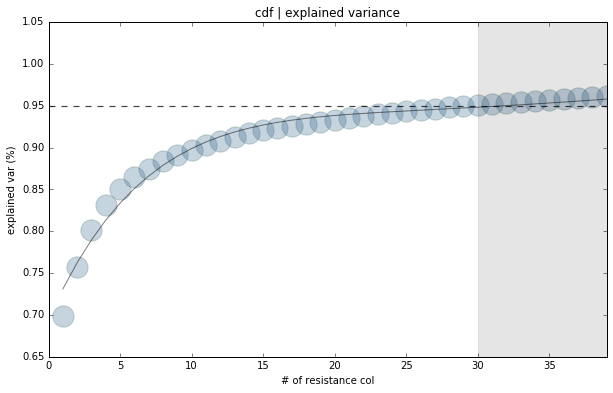

In [62]:
mpl.rc('figure', figsize=(10, 6))
xx = pca_range
yy = expl_var_list

max_show = max(y) + max(y)*.10
plt.scatter(xx,yy,color='#1E5484',s=450,alpha=0.25)
plt.scatter(xx,yy,facecolor='none',edgecolor='yellow',s=450,alpha=0.06,lw=1)

num_fit = 17
f1=np.polyfit(xx,yy,num_fit)
plt.plot(xx,np.polyval(f1,xx),color='black',zorder=700,lw=1,alpha=0.5)

plt.axvspan(pca_results[1],df.shape[1],alpha=0.1, color='black',zorder=1000)
plt.axhline(y=variance_thesshold, linewidth=1.2, color='black', alpha=0.75, linestyle='--')

plt.xlim(0,int(pca_results[1]*1.3))

plt.ylabel("explained var (%)")
plt.xlabel("# of resistance col")
plt.title('cdf | explained variance')
plt.show;

In [63]:
import warnings
warnings.filterwarnings('ignore')

In [64]:
cluster_scoring = []
cluster_range = np.arange(49)+2

for x in cluster_range:
    clf = KMeans(n_clusters=x)
    clf.fit(X_train)
    cluster_scoring.append(int(clf.score(X_test)))

In [65]:
dt_trans = X_train.copy()

K = range(1,cluster_range.max())
KM = [KMeans(n_clusters=k).fit(dt_trans) for k in K]
centroids = [k.cluster_centers_ for k in KM]

In [66]:
from scipy.spatial.distance import cdist, pdist

D_k = [cdist(dt_trans, cent, 'euclidean') for cent in centroids]
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]
avgWithinSS = [sum(d)/dt_trans.shape[0] for d in dist]

In [67]:
# Total with-in sum of square
wcss = [sum(d**2) for d in dist]
tss = sum(pdist(dt_trans)**2)/dt_trans.shape[0]
bss = tss-wcss

In [68]:
kIdx = 29

In [69]:
new_variance_thesshold = 0.91

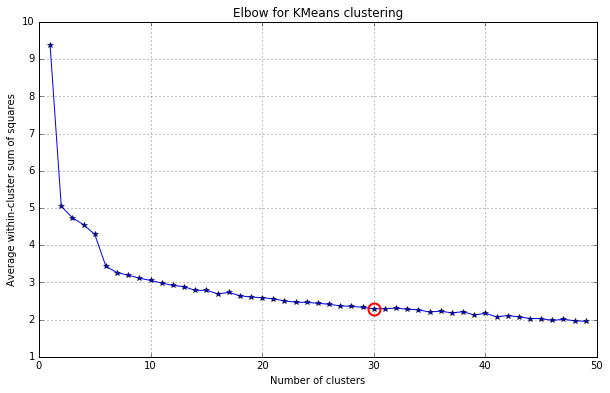

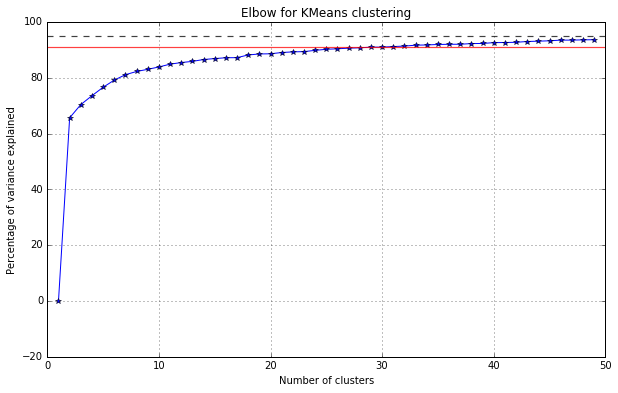

In [70]:
# elbow curve
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, avgWithinSS, 'b*-')
ax.plot(K[kIdx], avgWithinSS[kIdx], marker='o', markersize=12, 
markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Average within-cluster sum of squares')
plt.title('Elbow for KMeans clustering')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, bss/tss*100, 'b*-')
plt.axhline(y=new_variance_thesshold*100, linewidth=1.2, color='red', alpha=0.75, linestyle='-')
plt.axhline(y=variance_thesshold*100, linewidth=1.2, color='black', alpha=0.75, linestyle='--')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Percentage of variance explained')
plt.title('Elbow for KMeans clustering')

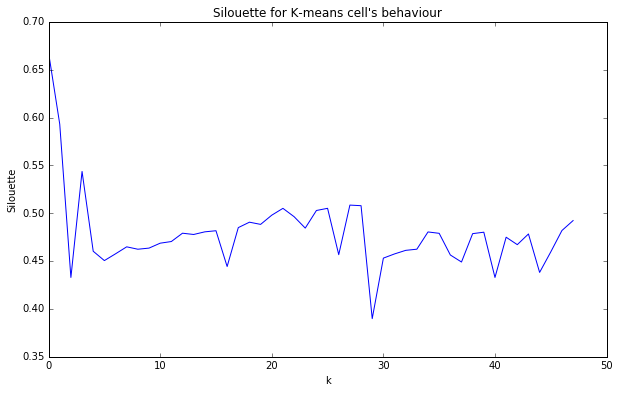

In [71]:
from sklearn.metrics import silhouette_score

s = []
for n_clusters in range(2,50):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(dt_trans)

    labels_X = kmeans.labels_
    centroids = kmeans.cluster_centers_

    s.append(silhouette_score(dt_trans, labels_X, metric='euclidean'))

plt.plot(s)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
# sns.despine() todo: py3 install

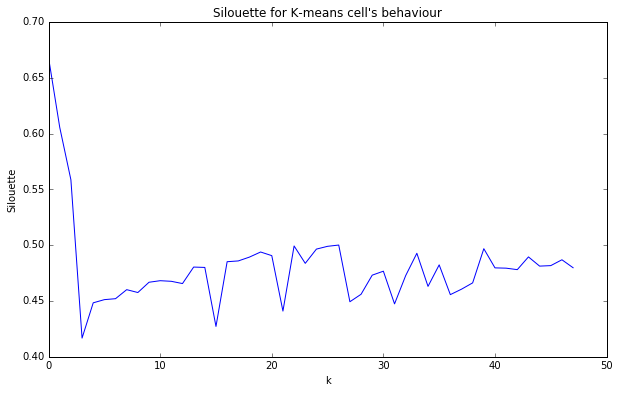

In [72]:
from sklearn.metrics import silhouette_score

s = []
for n_clusters in range(2,50):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(dt_trans)

    labels_Y = kmeans.labels_
    centroids = kmeans.cluster_centers_

    s.append(silhouette_score(dt_trans, labels_Y, metric='euclidean'))

plt.plot(s)
plt.ylabel("Silouette")
plt.xlabel("k")
plt.title("Silouette for K-means cell's behaviour")
# sns.despine() todo: py3 install

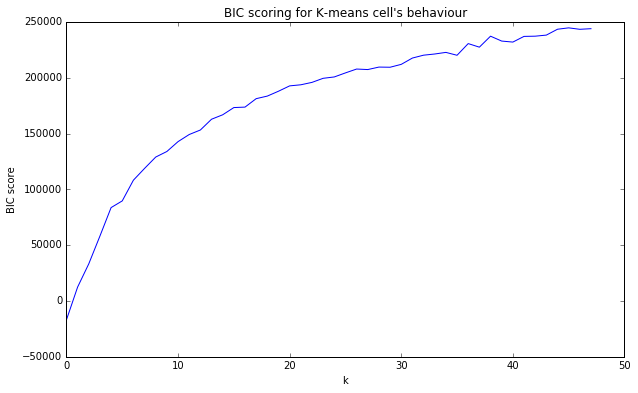

In [73]:
from sklearn.metrics import euclidean_distances

def bic(clusters, centroids):
    num_points = sum(len(cluster) for cluster in clusters)
    num_dims = clusters[0][0].shape[0]
    log_likelihood = _loglikelihood(num_points, num_dims, clusters, centroids)
    num_params = _free_params(len(clusters), num_dims)
    return log_likelihood - num_params / 2.0 * np.log(num_points)


def _free_params(num_clusters, num_dims):
    return num_clusters * (num_dims + 1)


def _loglikelihood(num_points, num_dims, clusters, centroids):
    ll = 0
    for cluster in clusters:
        fRn = len(cluster)
        t1 = fRn * np.log(fRn)
        t2 = fRn * np.log(num_points)
        variance = _cluster_variance(num_points, clusters, centroids) or np.nextafter(0, 1)
        t3 = ((fRn * num_dims) / 2.0) * np.log((2.0 * np.pi) * variance)
        t4 = (fRn - 1.0) / 2.0
        ll += t1 - t2 - t3 - t4
    return ll

def _cluster_variance(num_points, clusters, centroids):
    s = 0
    denom = float(num_points - len(centroids))
    for cluster, centroid in zip(clusters, centroids):
        distances = euclidean_distances(cluster, centroid)
        s += (distances*distances).sum()
    return s / denom

from scipy.spatial import distance
def compute_bic(kmeans,X):
    """
    Computes the BIC metric for a given clusters

    Parameters:
    -----------------------------------------
    kmeans:  List of clustering object from scikit learn

    X     :  multidimension np array of data points

    Returns:
    -----------------------------------------
    BIC value
    """
    # assign centers and labels
    centers = [kmeans.cluster_centers_]
    labels_Z  = kmeans.labels_
    #number of clusters
    m = kmeans.n_clusters
    # size of the clusters
    n = np.bincount(labels_Z)
    #size of data set
    N, d = X.shape

    #compute variance for all clusters beforehand
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(X[np.where(labels_Z == i)], [centers[0][i]], 'euclidean')**2) for i in range(m)])

    const_term = 0.5 * m * np.log(N) * (d+1)

    BIC = np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
             ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term

    return(BIC)

# sns.set_style("ticks")
# sns.set_palette(sns.color_palette("Blues_r"))
bics = []
for n_clusters in range(2,50):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(dt_trans)

    labels_ZZ = kmeans.labels_
    centroids = kmeans.cluster_centers_

    clusters = {}
    for i,d in enumerate(kmeans.labels_):
        if d not in clusters:
            clusters[d] = []
        clusters[d].append(dt_trans[i])

    bics.append(compute_bic(kmeans,dt_trans))#-bic(clusters.values(), centroids))

plt.plot(bics)
plt.ylabel("BIC score")
plt.xlabel("k")
plt.title("BIC scoring for K-means cell's behaviour")
# sns.despine()
#plt.savefig('figures/K-means-BIC.pdf', format='pdf', dpi=330,bbox_inches='tight')

## Train model & predict

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import RandomForestClassifier

In [75]:
clf = AdaBoostClassifier(n_estimators=500, random_state=rs)
# clf = RandomForestClassifier(n_estimators=500, random_state=rs, n_jobs=-1)

In [76]:
timer_start = time.time()
clf.fit(X_train, y_train);
time.time() - timer_start

2.1516120433807373

In [77]:
print(clf.score(X_test,y_test))

0.0366666666667


In [78]:
y_pred = clf.predict(X_test)

In [79]:
labeldf = pd.DataFrame({'labels':pd.Series(labels).unique()})
labeldf = labeldf.sort_values(['labels']).reset_index(drop=True)
labeldf['labels'] = labeldf['labels'].astype(str)

In [80]:
############################################################
# PLOT CONFUSION MATRIX
###########################################################

from sklearn.metrics import confusion_matrix
cm_df = pd.DataFrame(confusion_matrix(y_test, y_pred),columns=list(labeldf['labels'].values))
cm_pct = pd.DataFrame()
for x in cm_df.columns.values:
    cm_pct['%s'%x] = cm_df['%s'%x].values/  float(cm_df['%s'%x].sum())
print(cm_df)

    0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19
0   2  1  2  1  1  0  0  0  0  0   1   0   0   0   0   2   0   0   0   1
1   0  0  1  0  1  0  0  0  0  1   0   0   1   1   0   5   1   1   1   3
2   1  0  4  1  1  0  0  2  0  0   0   0   0   0   0   4   0   0   0   0
3   2  0  5  1  0  1  0  0  0  0   0   0   0   0   0   1   0   2   1   1
4   0  1  3  1  0  1  0  0  1  0   0   0   2   0   1   2   0   2   2   1
5   4  1  4  0  0  0  0  0  1  0   0   2   1   0   0   5   1   0   1   1
6   3  1  3  0  0  1  0  0  0  1   0   0   0   0   1   2   0   0   3   3
7   2  0  0  0  1  0  0  0  0  0   0   0   0   0   0   2   1   1   0   1
8   1  0  0  0  0  0  0  0  0  1   0   0   0   0   1   6   2   2   2   1
9   1  1  3  0  0  0  0  1  0  0   1   0   2   0   0   2   1   0   0   2
10  4  0  1  0  2  2  1  0  1  0   0   1   0   0   0   1   0   0   2   0
11  3  2  2  0  0  0  0  1  0  0   0   0   0   0   0   3   1   0   0   1
12  1  1  4  1  0  1  0  0  1  0   0   1   0   0   

In [81]:
# print(cm_pct)

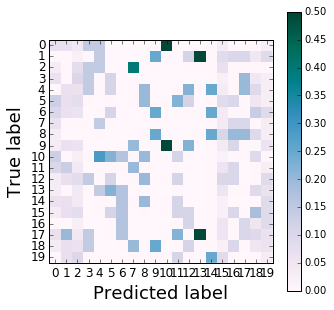

In [82]:
mpl.rc('figure', figsize=(5, 5))
plt.imshow(cm_pct, cmap=plt.cm.PuBuGn, interpolation='none')
plt.colorbar()
plt.xticks(range(len(cm_pct)), cm_pct.columns, family='Bitstream Vera Sans', fontsize=12)
plt.yticks(range(len(cm_pct)), cm_pct.columns, family='Bitstream Vera Sans', fontsize=12);
plt.ylabel('True label',family='Bitstream Vera Sans', fontsize=18)
plt.xlabel('Predicted label',family='Bitstream Vera Sans', fontsize=18)